In [1]:
import os
os.chdir('../')

In [30]:
import torch
import pandas as pd
from glob import glob
from tqdm import tqdm   

/home/tsa87/anaconda3/envs/tacogfn/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
result_files = glob('dataset/zinc_1000/*.csv')

In [25]:
avg_scores = {}
all_scores = []

for file in tqdm(result_files):
    pdb_id = file.split('/')[-1].split('_rec')[0]
    df = pd.read_csv(file)
    
    all_scores.extend(df['VINA_SCORE'].values)
    avg_scores[pdb_id] = min(df['VINA_SCORE'].mean(), 0)

100%|██████████| 15207/15207 [00:14<00:00, 1041.37it/s]


In [31]:
torch.save(avg_scores, 'dataset/pocket_to_avg_zinc_vina_score.pt')

In [26]:
#sort the dictionary by value
import numpy as np

np.mean(all_scores)

-7.159119627047481

(array([1.000000e+00, 1.000000e+00, 2.000000e+00, 9.000000e+00,
        1.600000e+01, 4.800000e+01, 9.100000e+01, 1.980000e+02,
        4.560000e+02, 9.620000e+02, 1.933000e+03, 4.045000e+03,
        1.169700e+04, 1.792400e+04, 3.229700e+04, 5.605400e+04,
        9.340400e+04, 1.505070e+05, 2.336650e+05, 3.446910e+05,
        4.876710e+05, 6.575380e+05, 8.460080e+05, 1.040566e+06,
        1.214571e+06, 1.813675e+06, 1.418405e+06, 1.379763e+06,
        1.265306e+06, 1.088144e+06, 8.766500e+05, 6.623670e+05,
        4.704030e+05, 3.164250e+05, 2.049960e+05, 1.298480e+05,
        8.092000e+04, 6.035600e+04, 2.532600e+04, 1.725600e+04,
        1.301000e+04, 1.108100e+04, 1.000000e+04, 9.247000e+03,
        8.527000e+03, 7.536000e+03, 6.711000e+03, 6.417000e+03,
        6.763000e+03, 9.485300e+04]),
 array([-15.4  , -15.092, -14.784, -14.476, -14.168, -13.86 , -13.552,
        -13.244, -12.936, -12.628, -12.32 , -12.012, -11.704, -11.396,
        -11.088, -10.78 , -10.472, -10.164,  -9.856,

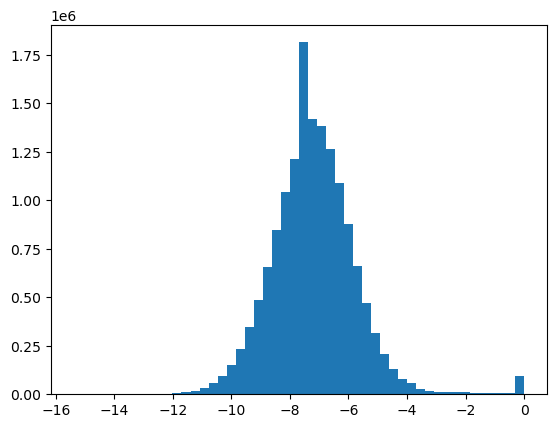

In [28]:
import matplotlib.pyplot as plt

plt.hist([min(0, s) for s in all_scores], bins=50)